# CAB420 Assignment 1A Question 2: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [27]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [28]:
# load data
train = pandas.read_csv('Data/Q2/training.csv')
val = pandas.read_csv('Data/Q2/validation.csv')
test = pandas.read_csv('Data/Q2/testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

test

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,o,70,83,108,86,85,120,97,57,95,...,-38.43,-17.24,-0.92,-2.54,-22.51,-0.87,-4.05,-18.47,-2.64,-4.87
157,d,48,37,59,98,60,108,73,24,55,...,0.02,-18.81,-1.58,-4.69,-18.48,-0.69,-3.50,-15.85,-1.33,-3.58
158,h,79,28,54,117,52,99,93,25,60,...,-5.03,-18.51,-1.36,-4.23,-18.09,-0.70,-3.27,-15.79,-1.21,-3.39
159,o,53,47,67,82,66,100,83,25,55,...,0.65,-17.88,0.33,-3.27,-19.06,-0.87,-4.05,-15.44,-0.87,-3.46


<Axes: title={'center': 'Testing Classes'}, xlabel='class'>

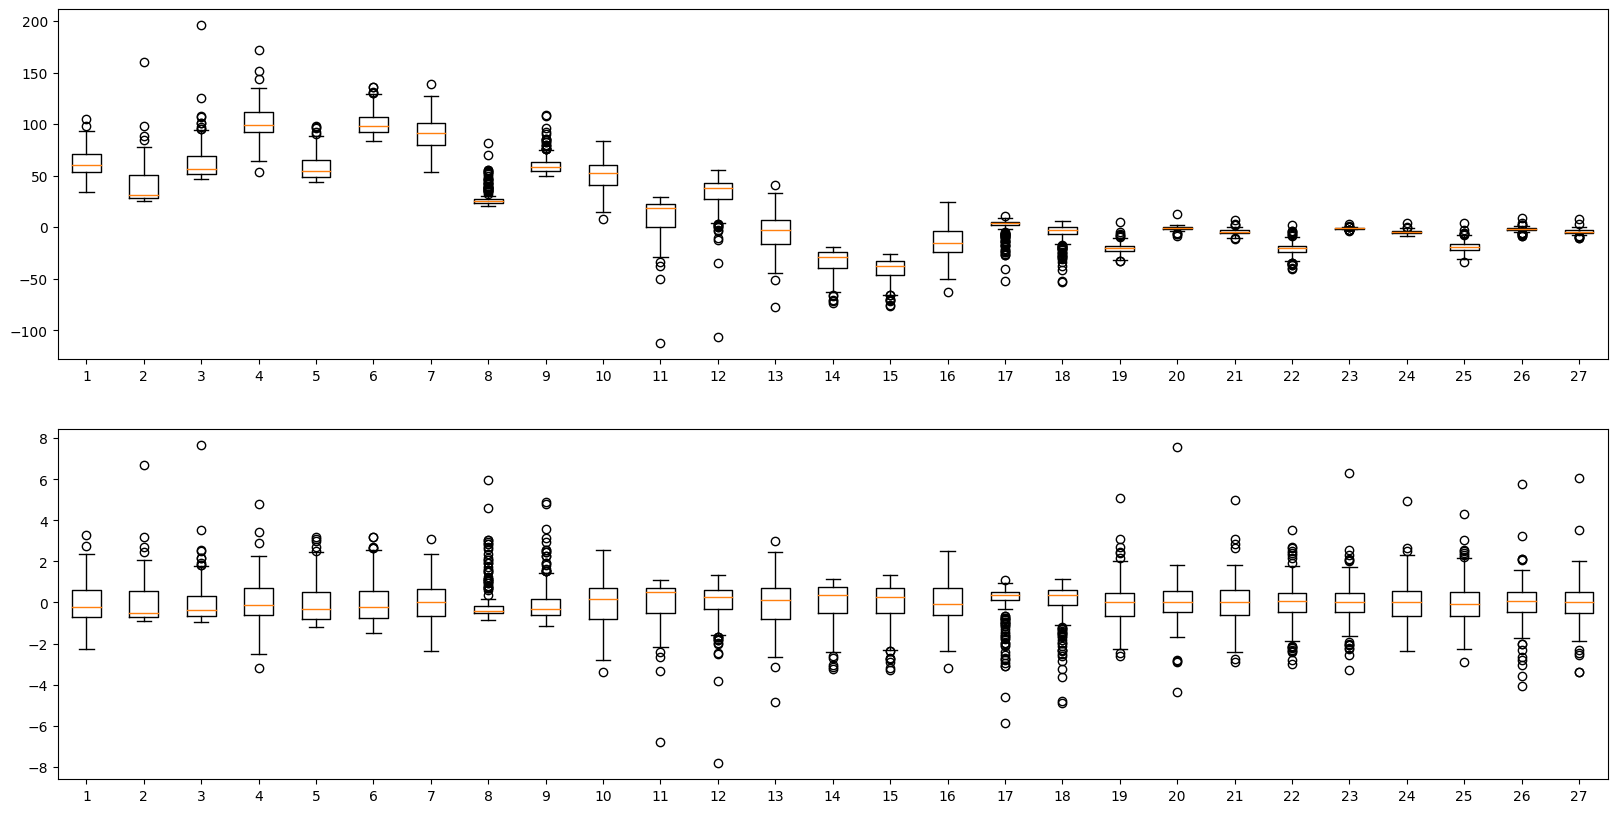

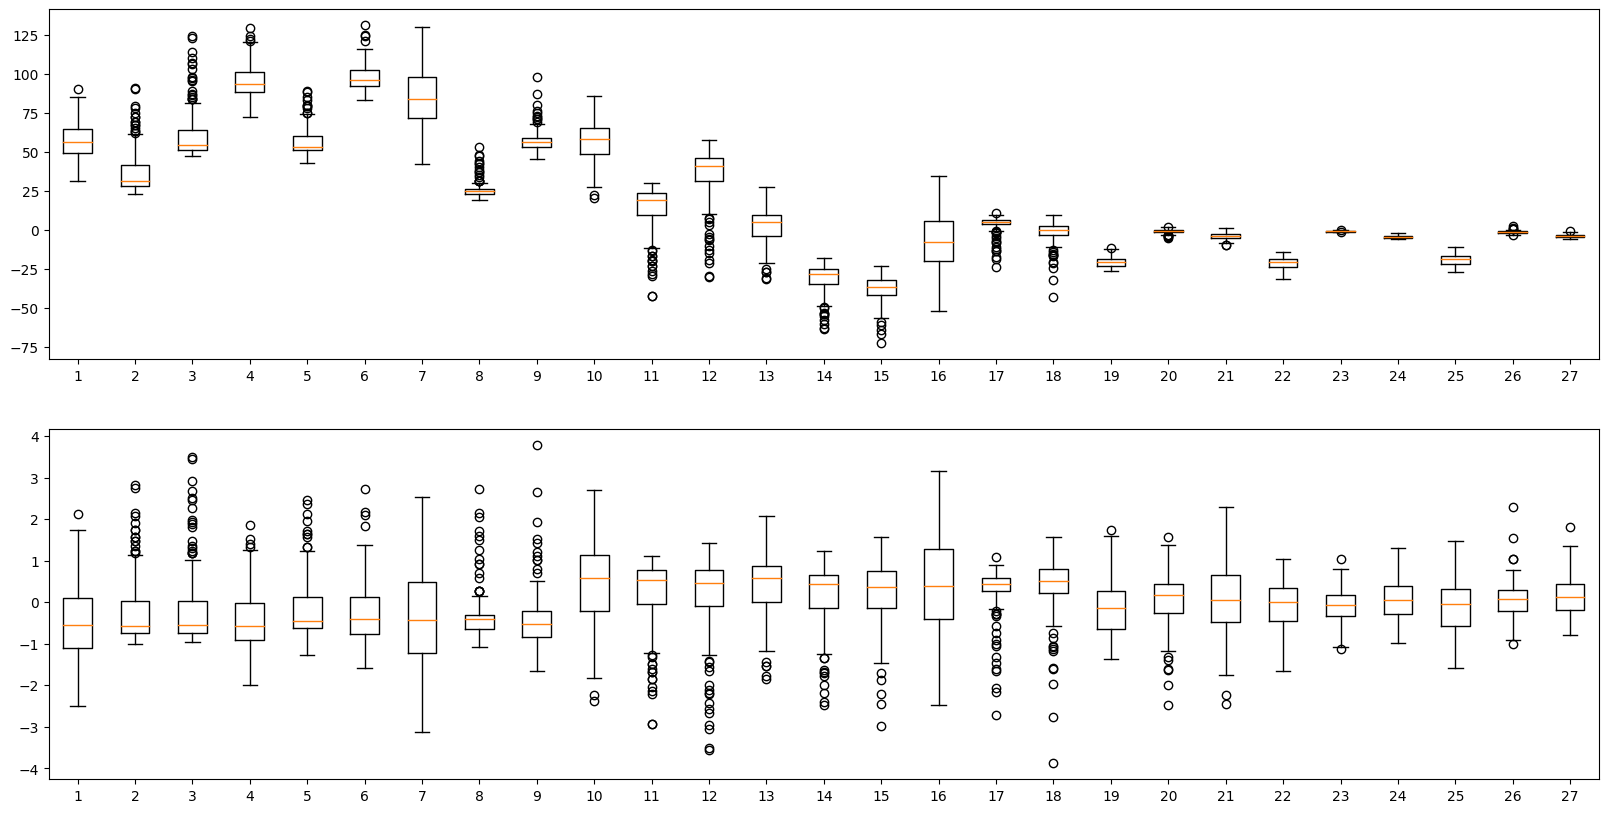

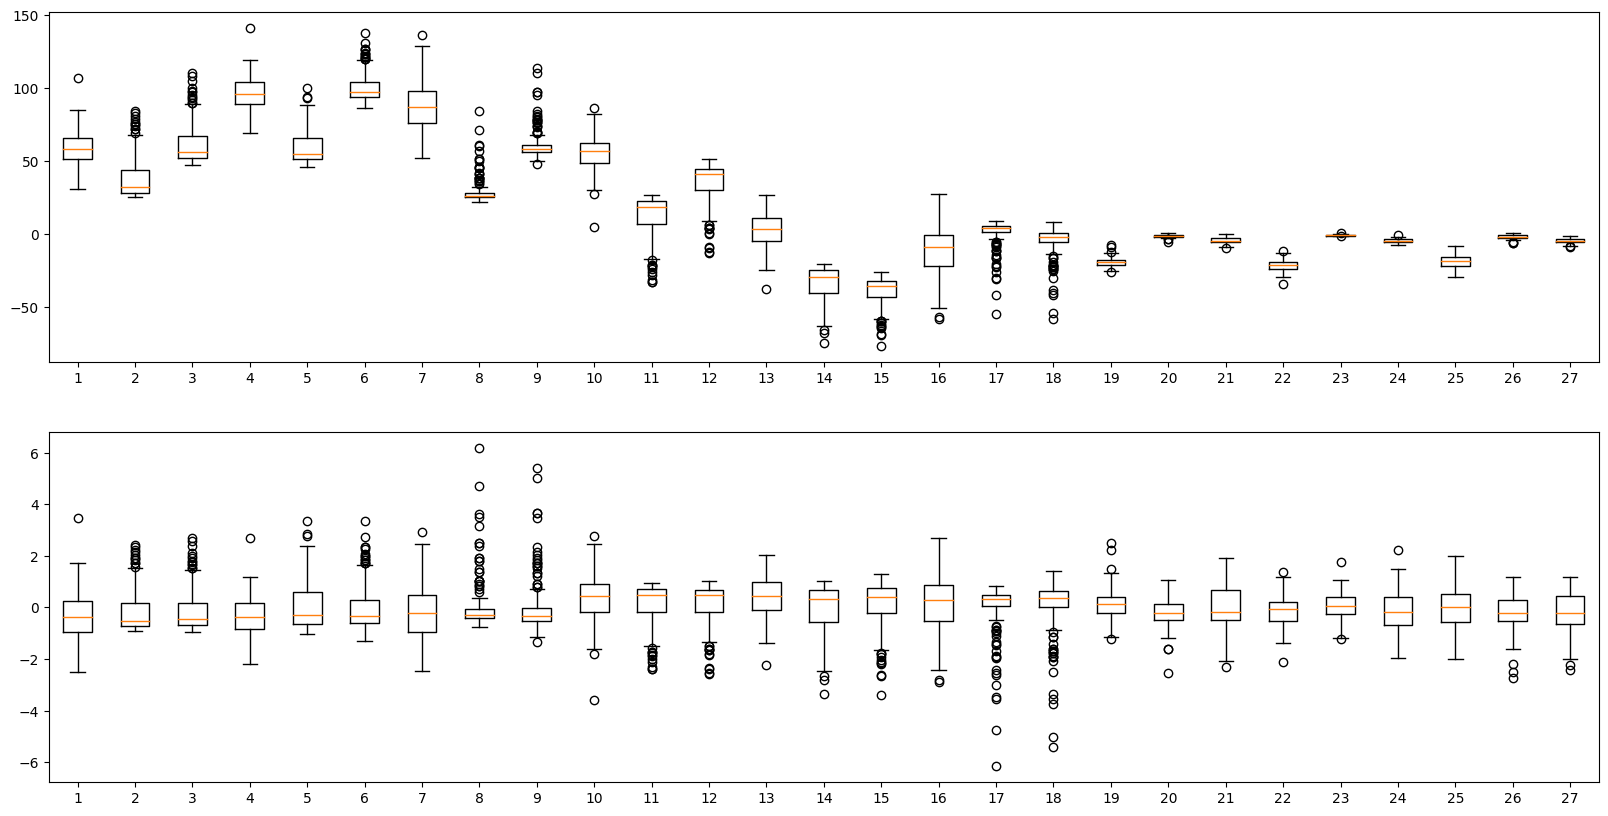

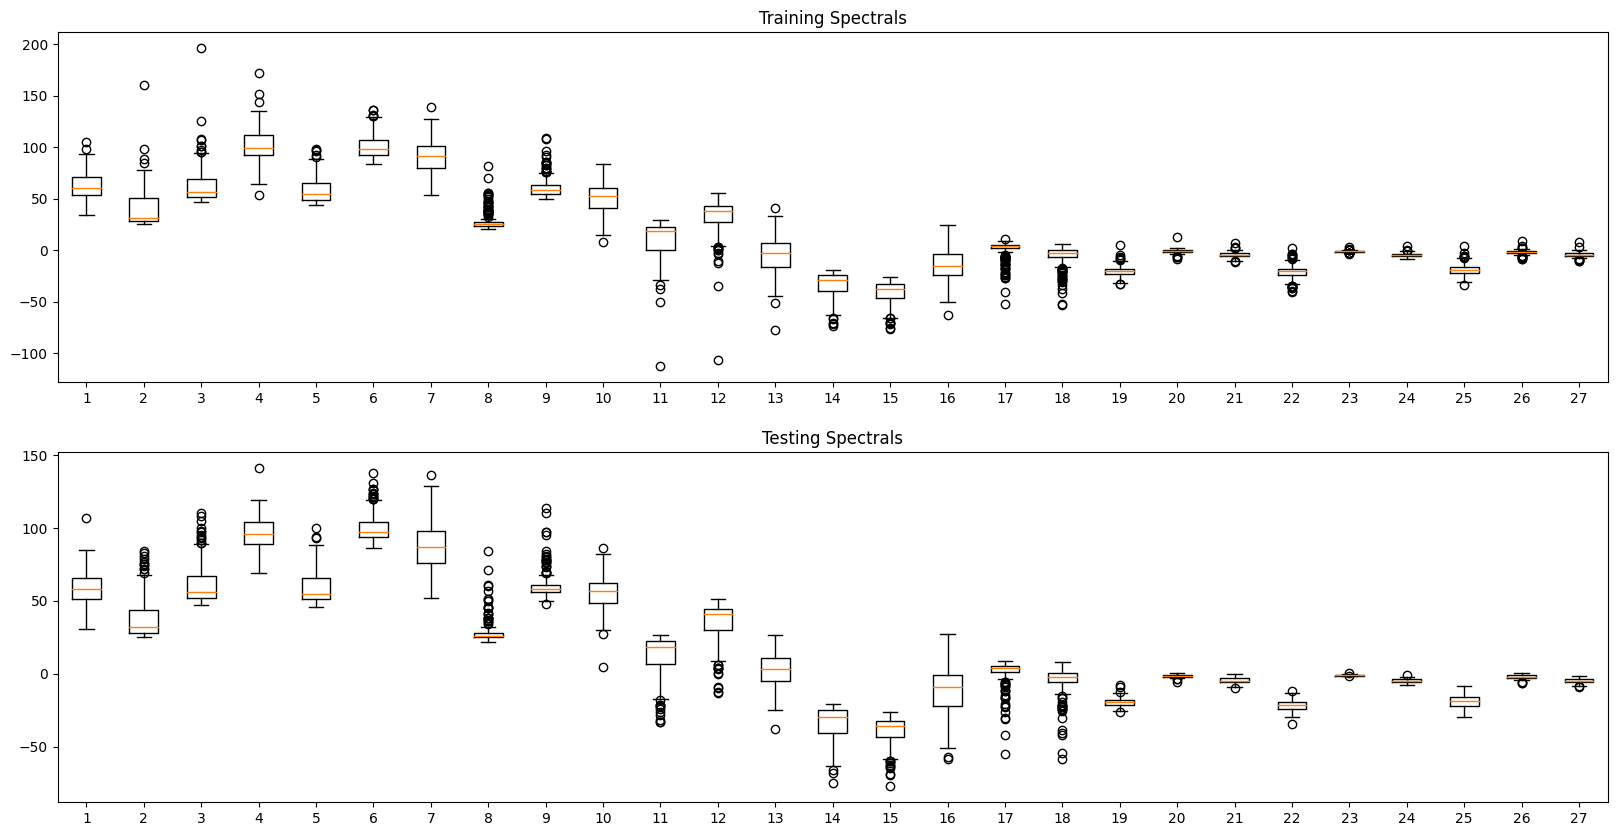

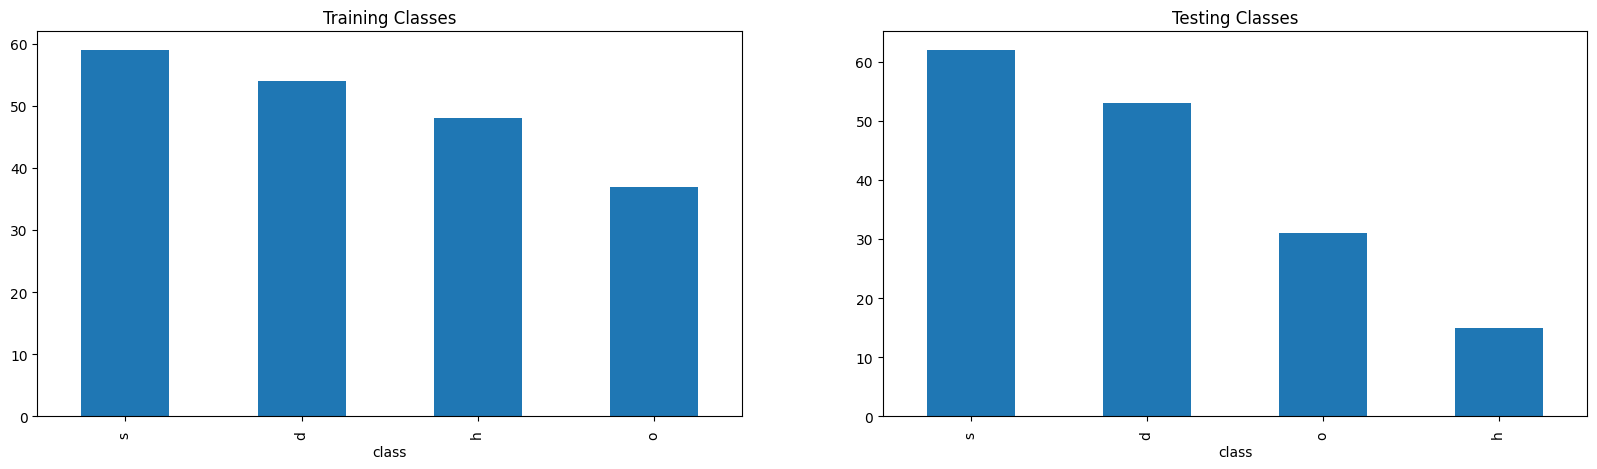

In [53]:
# Standardise the dataset
X_scalar = StandardScaler().fit(X_train)

X_train_std = X_scalar.transform(X_train)
X_val_std = X_scalar.transform(X_val)
X_test_std = X_scalar.transform(X_test)

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(X_train)

ax = fig.add_subplot(2, 1, 2)
ax.boxplot(X_train_std)

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(X_val)

ax = fig.add_subplot(2, 1, 2)
ax.boxplot(X_val_std)

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(X_test)

ax = fig.add_subplot(2, 1, 2)
ax.boxplot(X_test_std)

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(X_train)
ax.set_title('Training Spectrals')

ax = fig.add_subplot(2, 1, 2)
ax.boxplot(X_test)
ax.set_title('Testing Spectrals')

counts = train['class'].value_counts()
counts_2 = test['class'].value_counts()

fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(1, 2, 1)
counts.plot(kind='bar',title='Training Classes')

ax = fig.add_subplot(1, 2, 2)
counts_2.plot(kind='bar', title='Testing Classes')

In [30]:
# Really helpful function from CAB420_Classification_Example_2_Multi_Class_Classification.ipynb, with some minor modifications
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(f1_score(Y_train, pred, average='weighted')));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(f1_score(Y_test, pred, average='weighted')));

In [43]:
# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the train
# set. 

# Grid search each type with for loops, BC I want to have freedom over what is best.

n_neighbours = [1, 2, 4, 8, 16, 32, 64, 128]
weights = ['uniform', 'distance']
metric = ['cityblock', 'euclidean']

results = []
best_acc = 0
best_model = None

for k in n_neighbours:
    for w in weights:
        for m in metric:
            cknn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m).fit(X_train, Y_train)
            acc = f1_score(Y_val, cknn.predict(X_val), average='weighted')
            if (acc > best_acc):
                best_acc = acc
                best_model = cknn
            results.append({'k':k, 'weight':w, 'metric':m, 'f1':acc})

for r in results:
    print(r)

print(best_model)
print(best_acc)

{'k': 1, 'weight': 'uniform', 'metric': 'cityblock', 'f1': 0.8277044497121023}
{'k': 1, 'weight': 'uniform', 'metric': 'euclidean', 'f1': 0.8702687905183208}
{'k': 1, 'weight': 'distance', 'metric': 'cityblock', 'f1': 0.8277044497121023}
{'k': 1, 'weight': 'distance', 'metric': 'euclidean', 'f1': 0.8702687905183208}
{'k': 2, 'weight': 'uniform', 'metric': 'cityblock', 'f1': 0.8321373123268704}
{'k': 2, 'weight': 'uniform', 'metric': 'euclidean', 'f1': 0.851268287051449}
{'k': 2, 'weight': 'distance', 'metric': 'cityblock', 'f1': 0.8277044497121023}
{'k': 2, 'weight': 'distance', 'metric': 'euclidean', 'f1': 0.8702687905183208}
{'k': 4, 'weight': 'uniform', 'metric': 'cityblock', 'f1': 0.8524434157694977}
{'k': 4, 'weight': 'uniform', 'metric': 'euclidean', 'f1': 0.8525838859355903}
{'k': 4, 'weight': 'distance', 'metric': 'cityblock', 'f1': 0.8402246822411813}
{'k': 4, 'weight': 'distance', 'metric': 'euclidean', 'f1': 0.8584993271273342}
{'k': 8, 'weight': 'uniform', 'metric': 'citybl

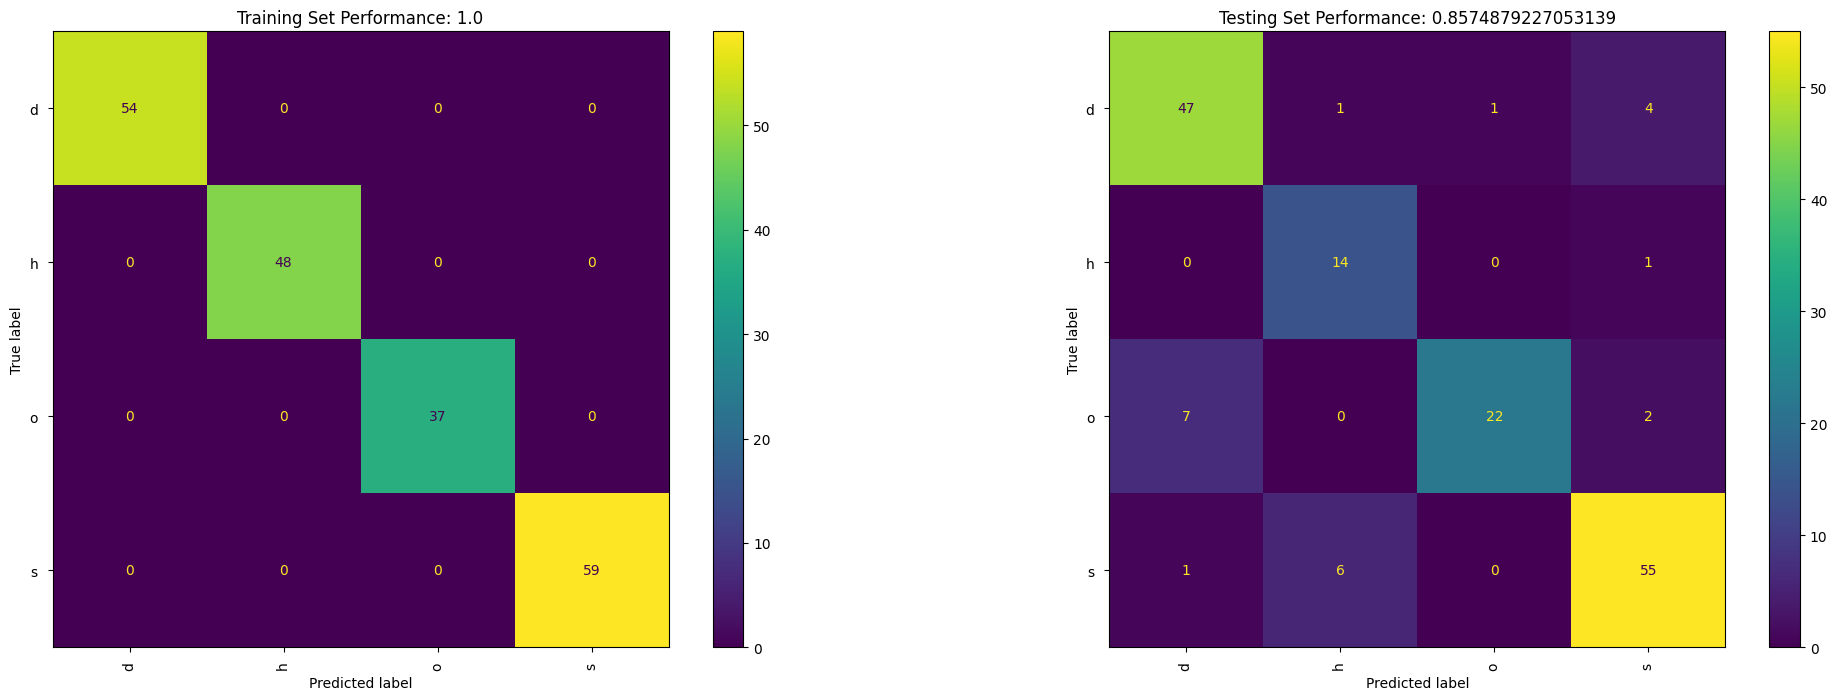

In [44]:
# Train your CKNN. You should consider the following parameters at least:
#  - K
#  - Distance Metric
#  - Weighting Scheme

eval_model(best_model, X_train, Y_train, X_test, Y_test)

In [55]:
# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the train
# set. 

# Grid search each type with for loops, BC I want to have freedom over what is best.

C = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
degree = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
gamma = ['scale', 'auto', 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4] # Only used by poly
kernel = ['poly', 'rbf', 'sigmoid'] # Only used when selecting gamma

results = []
best_acc = 0
best_model = None


for c in C:
    svm = SVC(kernel='linear', C=c, max_iter=int(1e4)).fit(X_train, Y_train)
    acc = f1_score(Y_val, svm.predict(X_val), average='weighted')

    if (acc > best_acc):
        best_acc = acc
        best_model = svm
    results.append({'C':c, 'kernal':'linear', 'f1': acc})

for c in C:
    for d in degree: 
        svm = SVC(kernel='poly', C=c, degree=d, max_iter=int(1e4)).fit(X_train, Y_train)
        acc = f1_score(Y_val, svm.predict(X_val), average='weighted')

        if (acc > best_acc):
            best_acc = acc
            best_model = svm
        results.append({'C':c, 'kernal':'poly', 'degree':d, 'f1': acc})

for c in C:
    for g in gamma: 
        for k in kernel:
            svm = SVC(kernel=k, C=c, gamma=g, max_iter=int(1e4)).fit(X_train, Y_train)
            acc = f1_score(Y_val, svm.predict(X_val), average='weighted')

            if (acc > best_acc):
                best_acc = acc
                best_model = svm
            results.append({'C':c, 'kernal':k, 'gamma':g, 'f1': acc})


            

for r in results:
    print(r)

print(best_model)
print(best_acc)

{'C': 0.0001, 'kernal': 'linear', 'f1': 0.8327591296407092}
{'C': 0.001, 'kernal': 'linear', 'f1': 0.8290072580749731}
{'C': 0.01, 'kernal': 'linear', 'f1': 0.8435141708084892}
{'C': 0.1, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 1, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 10.0, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 100.0, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 1000.0, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 10000.0, 'kernal': 'linear', 'f1': 0.8492220246343671}
{'C': 0.0001, 'kernal': 'poly', 'degree': 0, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 1, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 2, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 3, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 4, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 5, 'f1': 0.2805902848944456}
{'C': 0.0001, 'kernal': 'poly', 'degree': 6, 'f

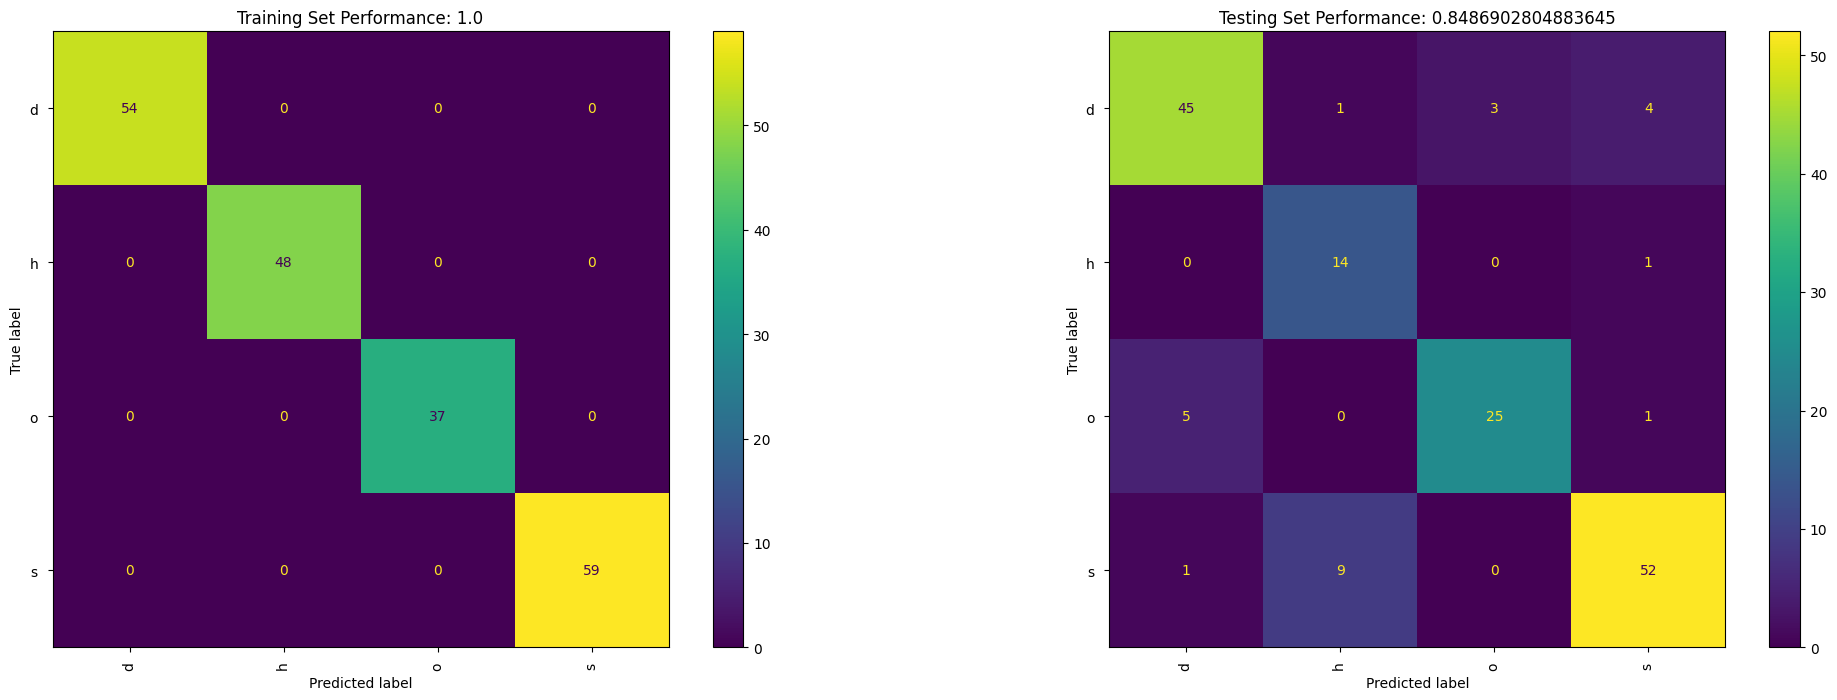

In [46]:
# Train your SVM. You should consider the following parameters at least:
#  - C
#  - Kernel Type
#  - Kernel Parameters

eval_model(best_model, X_train, Y_train, X_test, Y_test)

In [57]:
# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the train
# set. 

# Grid search each type with for loops, BC I want to have freedom over what is best.

depth = [None, 1, 2, 4, 8, 16, 32, 64, 128]
n_estimators = [1, 5, 10, 15, 20, 25, 50, 100, 200, 400]
class_weight = [None, 'balanced_subsample', 'balanced']

results = []
best_acc = 0
best_model = None

for d in depth:
    for n in n_estimators:
        for cw in class_weight:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=314, class_weight=cw).fit(X_train, Y_train)
            acc = f1_score(Y_val, rf.predict(X_val), average='weighted')
            if (acc > best_acc):
                best_acc = acc
                best_model = rf
            results.append({'depth':d, 'n_estimators':n, 'class weight':cw, 'f1':acc})

for r in results:
    print(r)

print(best_model)
print(best_acc)

{'depth': None, 'n_estimators': 1, 'class weight': None, 'f1': 0.7517114169389357}
{'depth': None, 'n_estimators': 1, 'class weight': 'balanced_subsample', 'f1': 0.8055505178948236}
{'depth': None, 'n_estimators': 1, 'class weight': 'balanced', 'f1': 0.8274627811213178}
{'depth': None, 'n_estimators': 5, 'class weight': None, 'f1': 0.7928763101721479}
{'depth': None, 'n_estimators': 5, 'class weight': 'balanced_subsample', 'f1': 0.8244396428194337}
{'depth': None, 'n_estimators': 5, 'class weight': 'balanced', 'f1': 0.7988051384815168}
{'depth': None, 'n_estimators': 10, 'class weight': None, 'f1': 0.8225637426247662}
{'depth': None, 'n_estimators': 10, 'class weight': 'balanced_subsample', 'f1': 0.8007373509348775}
{'depth': None, 'n_estimators': 10, 'class weight': 'balanced', 'f1': 0.7751784209911133}
{'depth': None, 'n_estimators': 15, 'class weight': None, 'f1': 0.8046208904010262}
{'depth': None, 'n_estimators': 15, 'class weight': 'balanced_subsample', 'f1': 0.8481584525265444}


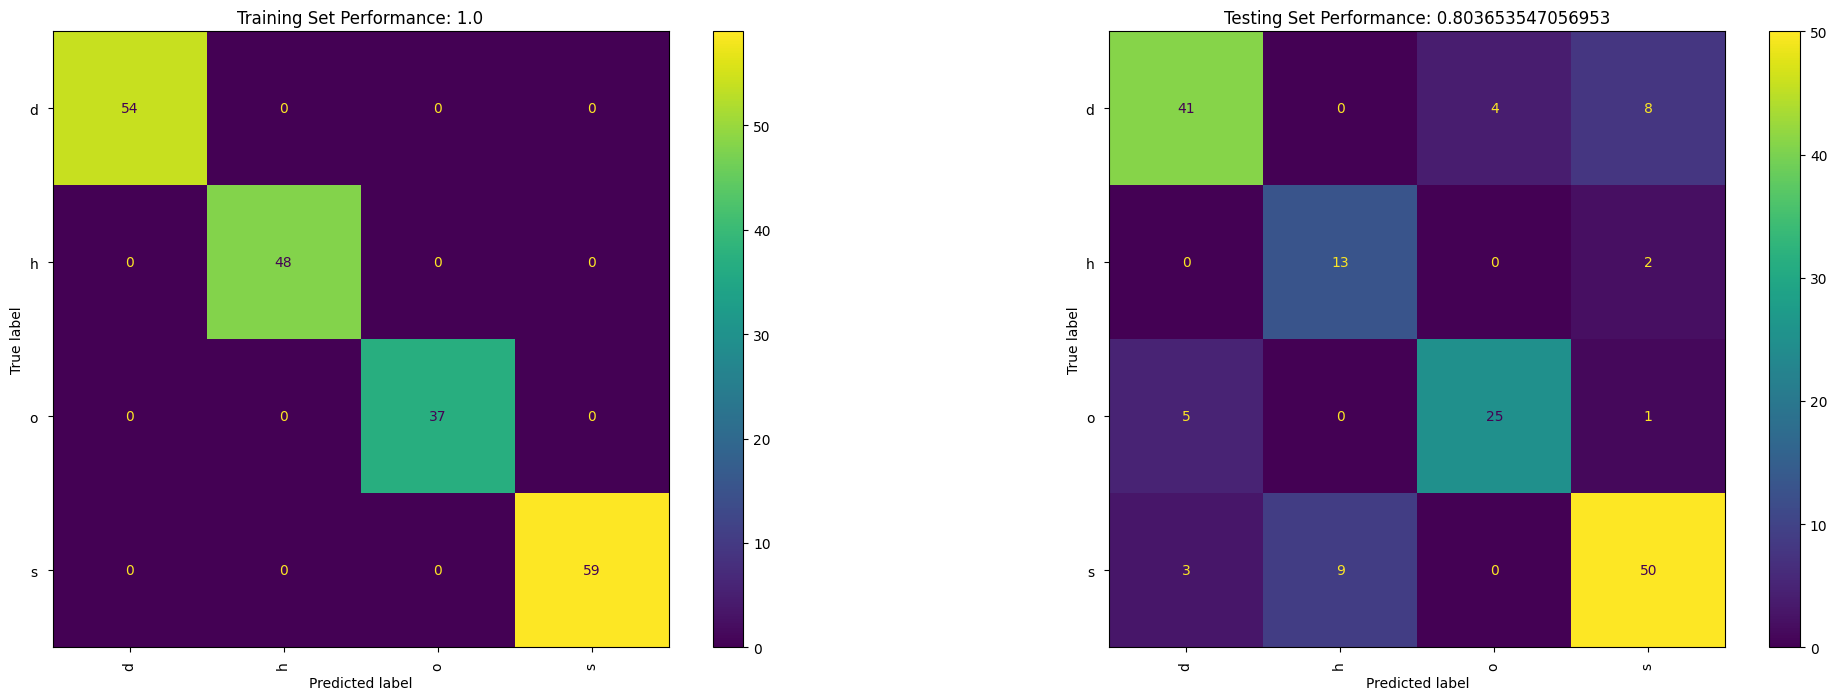

In [58]:
# Train your RF. You should consider the following parameters at least:
#  - Tree depth
#  - Number of estimators
eval_model(best_model, X_train, Y_train, X_test, Y_test)

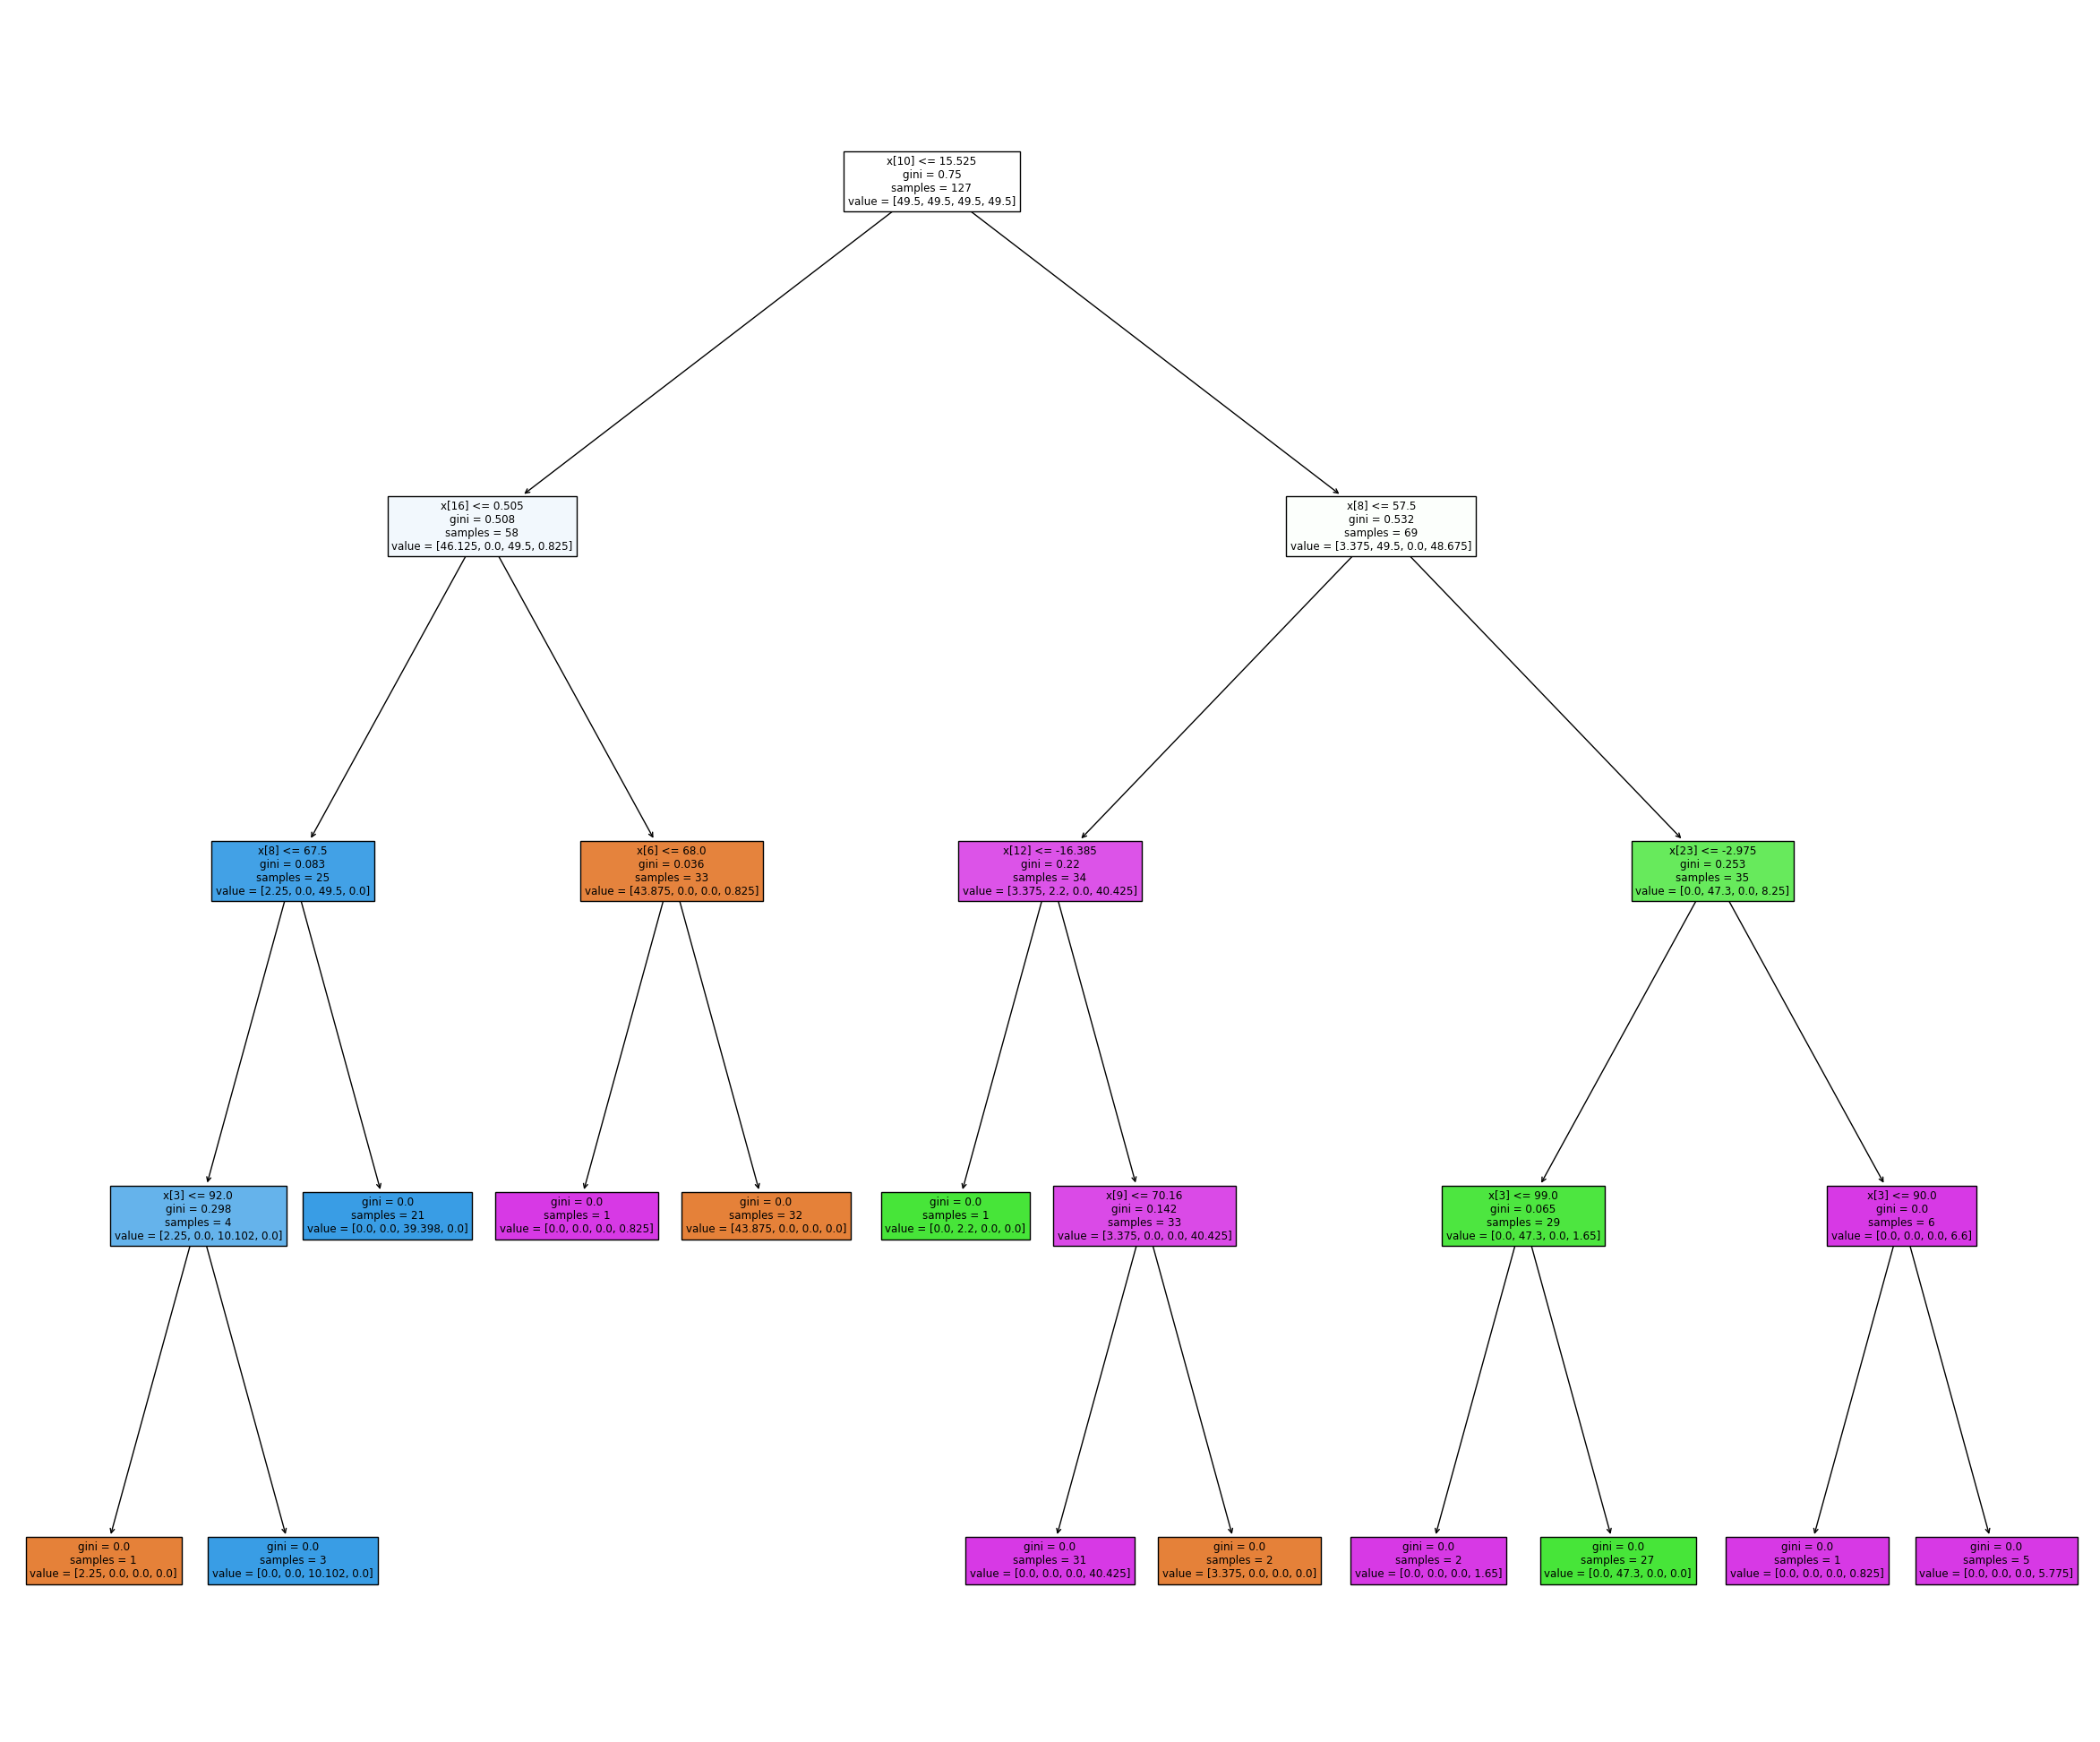

In [59]:
# Evaluate the three methods. This should consider appropriate performance measures for the classifiers, such as F1, and 
# visualisations of performance (i.e. confusion matrices) that demonstrate any difference in perfomance between the models.

fig = plt.figure(figsize=(30,25))
ax = tree.plot_tree(best_model.estimators_[1], filled=True)



In [38]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the hyper-parameters for each of your models, and how these may be influenced by any data 
#   characteristics, and any effect you may see from the selected hyper-parameters (ie. if you have found a small value for a 
#   hyper parameter, what effect will this have on the model compared to a large value?) 
# - an evaluation and comparison of three models, which should highlight any differences observed between the models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT